In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import pathlib

In [ ]:
url='/content/drive/MyDrive/project cuoi ky/train'
generator= ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_data=generator.flow_from_directory(url,target_size=(64,64),batch_size=10,class_mode='categorical',subset='training')
validation_data=generator.flow_from_directory(url,target_size=(64,64),batch_size=10,class_mode='categorical',subset='validation')
label = list()
for key in train_data.class_indices:
  label.append(key)
validation_data.class_indices
print(label)

Found 2576 images belonging to 15 classes.
Found 636 images belonging to 15 classes.
['bim bip', 'bo cau trang', 'boica', 'canh cut', 'chao mao', 'chim cong', 'chim cu meo', 'chim tri vang', 'chim vanganh', 'dai bang', 'haiau', 'hong hac', 'hyacinth macaw', 'thiennga', 'vetduoidai']


In [ ]:
model= Sequential()
model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding ='same',input_shape=(64,64,3)))
model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation = 'relu', kernel_initializer='he_uniform' ))
model.add(Dense(15, activation='softmax'))
opt=Adam(lr=0.002)
model.compile (optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_data,epochs=100,batch_size=64,validation_data=validation_data,verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
  5/258 [..............................] - ETA: 10:07 - loss: 4.7195 - accuracy: 0.0600

KeyboardInterrupt: ignored

In [ ]:
model.save('Final.h5')


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model=load_model('/content/drive/MyDrive/project cuoi ky/Final.h5')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

In [ ]:
import pathlib

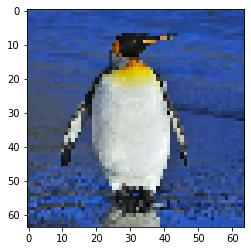

canh cut


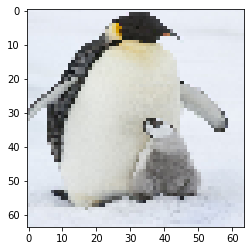

canh cut


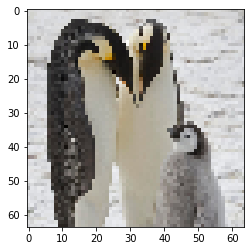

canh cut


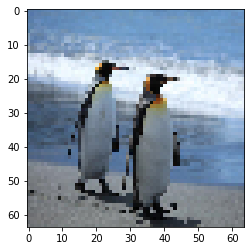

chao mao


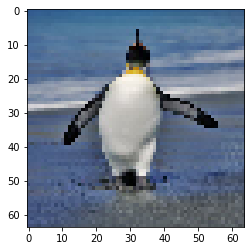

canh cut


In [ ]:
for image in pathlib.Path('/content/drive/MyDrive/project cuoi ky/test/canh cut').iterdir():
  img = load_img(image,target_size=(64,64))
  plt.imshow(img)
  plt.show()
  img = img_to_array(img)
  img = img.reshape(1,64,64,3)
  print(label[np.argmax(model.predict(img),axis = 1)[0]])